### [OpenAQ REST API](https://api.openaq.org/)

Napisz program w Pythonie, który pobierze dane na temat jakości powietrza we wskazanym mieście z publicznego API "OpenAQ REST API" i wyświetli informacje na temat stężenia [pyłów pm2.5](https://pl.wikipedia.org/wiki/PM2,5)  na wykresie.

Od czerwca 2024 OpenAQ REST API wymaga uwierzytelnienia. 

#### Pobranie danych  o powietrzu w danym mieście

In [26]:
import requests

url = "https://api.openaq.org/v2/measurements?city=Warszawa&limit=100&parameter=pm25"
       
headers = {
    'X-API-Key': 'cdbf800e00bc4b346c04924db53b51491599baf0cd8d3c8c168853a5ab356e09'
}
res = requests.get(url, headers=headers)
res

<Response [200]>

In [28]:
data = res.json()
data

{'meta': {'name': 'openaq-api',
  'license': '',
  'website': '/',
  'page': 1,
  'limit': 100,
  'found': '>100'},
 'results': [{'locationId': 7245,
   'location': 'Warszawa, ul. Kondratowicza',
   'parameter': 'pm25',
   'value': 21.7,
   'date': {'utc': '2024-10-27T12:00:00+00:00',
    'local': '2024-10-27T13:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 52.290864, 'longitude': 21.042458},
   'country': 'PL',
   'city': None,
   'isMobile': False,
   'isAnalysis': None,
   'entity': 'Governmental Organization',
   'sensorType': 'reference grade'},
  {'locationId': 7245,
   'location': 'Warszawa, ul. Kondratowicza',
   'parameter': 'pm25',
   'value': 25.2,
   'date': {'utc': '2024-10-27T11:00:00+00:00',
    'local': '2024-10-27T12:00:00+01:00'},
   'unit': 'µg/m³',
   'coordinates': {'latitude': 52.290864, 'longitude': 21.042458},
   'country': 'PL',
   'city': None,
   'isMobile': False,
   'isAnalysis': None,
   'entity': 'Governmental Organization',
   'sensor

#### Analiza i wizualizacja danych

In [29]:
results = data['results']

In [31]:
pm25 = [result['value'] for result in results]

In [47]:
import datetime

 
measurements_dt = [
    datetime.datetime.strptime(result['date']['utc'], '%Y-%m-%dT%H:%M:%S%z') for result in results
]

Text(0.5, 1.0, 'Poziom pm25 w czasie')

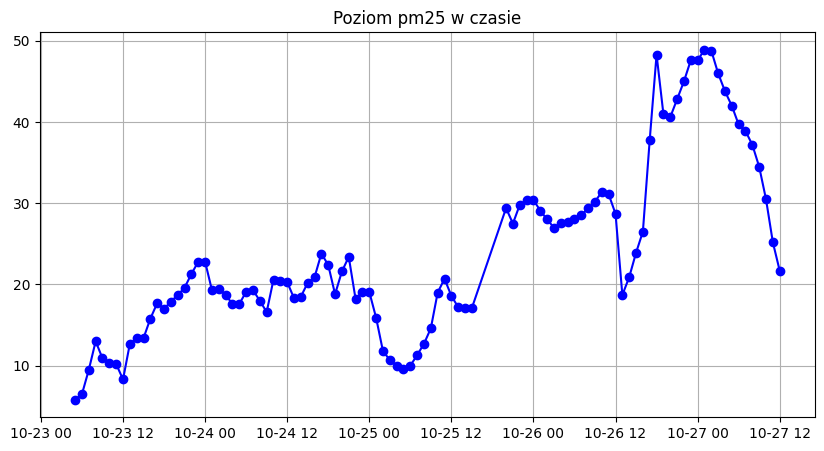

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(measurements_dt, pm25, marker='o',  color='b')
plt.grid(True)
plt.title('Poziom pm25 w czasie')

In [46]:
# seaborn